# SUPERVISED ALGORITHMS

# Librerias

In [ ]:
from sklearn.datasets import *
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

## SUPERVISED ALGORITHMS

- We are given $X$ and $y$


In [ ]:
# Importamos la clase DecisionTreeClassifier del módulo tree de scikit-learn
from sklearn.tree import DecisionTreeClassifier
# Generamos un conjunto de datos de 400 puntos con ruido
X,y = make_moons(500, noise=0.1)
# Imprimimos las formas de X e y
X.shape, y.shape

((500, 2), (500,))

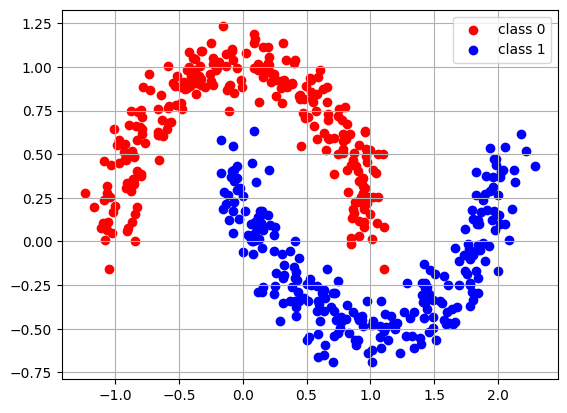

In [ ]:
# Graficamos los puntos donde y es igual a 0, con color rojo y etiqueta "class 0"
plt.scatter(X[y==0][:,0], X[y==0][:,1], color="red", label="class 0")
# Graficamos los puntos donde y es igual a 1, con color azul y etiqueta "class 1"
plt.scatter(X[y==1][:,0], X[y==1][:,1], color="blue", label="class 1")
# Agregamos la leyenda para distinguir las clases
plt.legend();
# Mostramos una rejilla en el gráfico
plt.grid();

In [ ]:
X[:10]

array([[ 1.23243237, -0.64084318],
       [ 0.66356844, -0.15978411],
       [-0.13512525,  1.07221542],
       [ 1.88312234,  0.23713986],
       [-0.41136363,  0.89291415],
       [ 0.50602433, -0.56178735],
       [ 1.66067416, -0.46037821],
       [ 2.11034157,  0.18722937],
       [ 1.01584741, -0.47634148],
       [ 0.20775902,  1.05871607]])

In [ ]:
y[:10]

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0])

## Clasificador Lineal

In [ ]:
# Importamos la clase LogisticRegression del módulo linear_model de scikit-learn
from sklearn.linear_model import LogisticRegression
# Creamos una instancia de LogisticRegression
lr = LogisticRegression()
# Entrenamos el modelo LogisticRegression con los datos X e y
lr.fit(X,y)
# Calculamos el score del modelo, que es la precisión en este caso, utilizando los mismos datos de entrenamiento
lr.score(X,y)

0.892

In [ ]:
# @markdown Funciones necesarias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Función para graficar los datos en 2D
def plot_2Ddata(X, y, dots_alpha=0.3):
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=dots_alpha, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
    plt.xlabel("col_0")
    plt.ylabel("col_1")

# Función para graficar los límites de decisión del clasificador
def plot_2D_boundary(predict, x_min, x_max, line_width=3, line_alpha=0.7, label=None):
    x0, x1 = np.meshgrid(
        np.linspace(x_min[0], x_max[0], 100),
        np.linspace(x_min[1], x_max[1], 100)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = predict(X_new).reshape(x0.shape)

    plt.contour(x0, x1, y_pred, colors='k', linewidths=line_width, alpha=line_alpha)

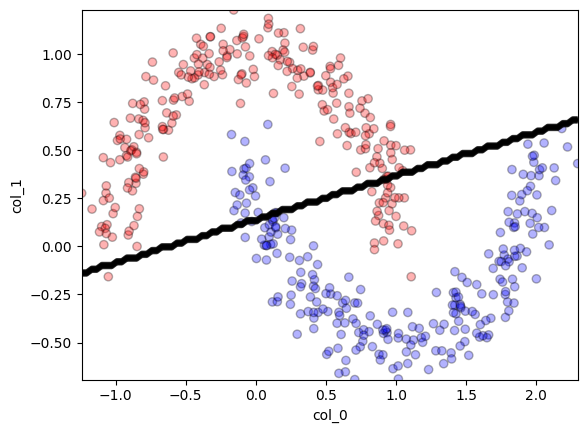

In [ ]:
# Graficamos los puntos de datos en el plano XY, donde el color de los puntos corresponde a la clase a la que pertenecen
plot_2Ddata(X, y)
# Graficamos el límite de decisión del modelo de regresión logística
# utilizando la función predict del modelo para predecir las etiquetas de los puntos
plot_2D_boundary(lr.predict, np.min(X, axis=0), np.max(X, axis=0))
# Mostramos el gráfico
plt.show()


## Arboles de decision

In [ ]:
# Creamos un clasificador de árbol de decisión con una profundidad máxima de 2
dt = DecisionTreeClassifier(max_depth=2)
# Entrenamos el clasificador de árbol de decisión con los datos X e y
dt.fit(X,y)
# Realizamos predicciones sobre los datos de entrenamiento X
y_preds = dt.predict(X)
# Calculamos el score del clasificador, que es la precisión en este caso, utilizando los mismos datos de entrenamiento
dt.score(X,y)

0.932

In [ ]:
# @markdown Funciones necesarias para graficar
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap



# # Entrenar el modelo de árbol de decisión
# dt = DecisionTreeClassifier(max_depth=3)
# dt.fit(X, y)

# Función para graficar los datos en 2D
def plot_2Ddata(X, y, dots_alpha=0.3):
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=dots_alpha, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
    plt.xlabel("col_0")
    plt.ylabel("col_1")

# Función para graficar los límites de decisión del clasificador
def plot_2D_boundary(predict, x_min, x_max, line_width=3, line_alpha=0.7, label=None):
    x0, x1 = np.meshgrid(
        np.linspace(x_min[0], x_max[0], 100),
        np.linspace(x_min[1], x_max[1], 100)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = predict(X_new).reshape(x0.shape)

    plt.contour(x0, x1, y_pred, colors='k', linewidths=line_width, alpha=line_alpha)


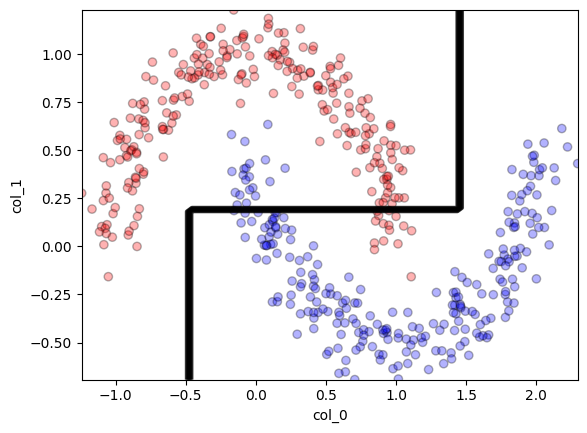

In [ ]:
# Graficar los datos y los límites de decisión
plot_2Ddata(X, y)
plot_2D_boundary(dt.predict, np.min(X, axis=0), np.max(X, axis=0))
plt.show()

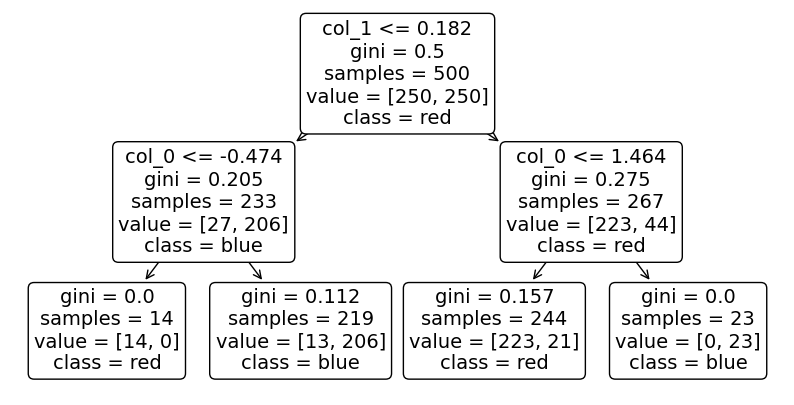

In [ ]:
# Importamos la función plot_tree del módulo tree de scikit-learn
from sklearn.tree import plot_tree
# Creamos una figura con un tamaño de 10x5 pulgadas para visualizar el árbol de decisión
plt.figure(figsize=(10,5))
# Visualizamos el árbol de decisión dt, especificando los nombres de las características (features) y las clases
plot_tree(dt, feature_names=["col_0", "col_1"], class_names=["red", "blue"], rounded=True);



*   Col: Representa el nombre de la característica que se está utilizando en ese nodo del árbol para tomar decisiones.
*   Impureza de Gini: es una medida de cuánto se mezclan las clases en un nodo dado
*  Samples: indica el número de muestras que llegan a ese nodo y cumplen las condiciones
* Value: Es una lista que muestra cuántas muestras de cada clase llegan a ese nodo
* Class: muestra la clase mayoritaria de las muestras en ese nodo.



In [ ]:
# @markdown Funciones para graficar

from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np


# Entrenamos un clasificador de árbol de decision
# dt = DecisionTreeClassifier(max_depth=10)
# dt.fit(X, y)

# Función para visualizar los datos y el límite de decisión
def plot_2Ddata(X, y, dots_alpha=.3):
    colors = ['blue' if label == 1 else 'red' for label in y]
    plt.scatter(X[:, 0], X[:, 1], color=colors, alpha=dots_alpha)

def plot_2D_boundary(predict_fn, Xmin, Xmax, line_width=3, line_alpha=.7, label=None):
    xx, yy = np.meshgrid(np.linspace(Xmin[0], Xmax[0], 500),
                         np.linspace(Xmin[1], Xmax[1], 500))
    Z = predict_fn(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=line_width, alpha=line_alpha)

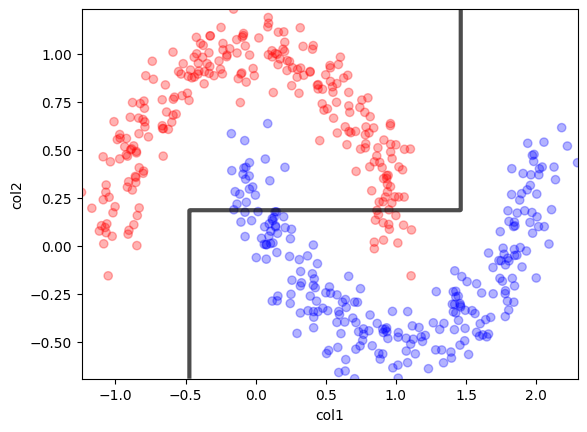

In [ ]:
# Visualizamos los datos y el límite de decisión
plot_2Ddata(X, y)
plot_2D_boundary(dt.predict, np.min(X, axis=0), np.max(X, axis=0))
plt.xlabel("col1")
plt.ylabel("col2")
plt.show()

In [ ]:
X,y = make_circles(400, noise=0.05)

In [ ]:
# @markdown Funciones para graficar

from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np


# Entrenamos un clasificador de árbol de decisión
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X, y)

# Función para visualizar los datos y el límite de decisión
def plot_2Ddata(X, y, dots_alpha=.3):
    colors = ['blue' if label == 1 else 'red' for label in y]
    plt.scatter(X[:, 0], X[:, 1], color=colors, alpha=dots_alpha)

def plot_2D_boundary(predict_fn, Xmin, Xmax, line_width=3, line_alpha=.7, label=None):
    xx, yy = np.meshgrid(np.linspace(Xmin[0], Xmax[0], 500),
                         np.linspace(Xmin[1], Xmax[1], 500))
    Z = predict_fn(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=line_width, alpha=line_alpha)

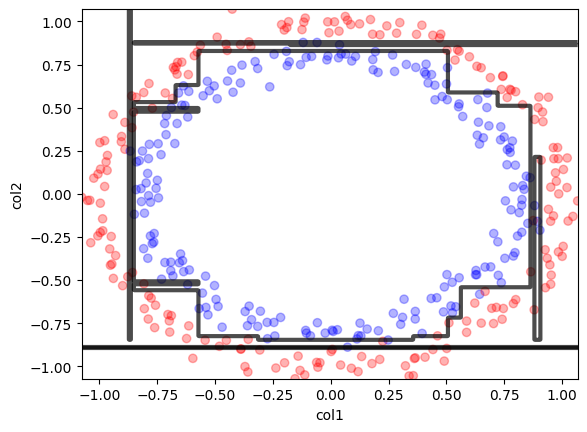

In [ ]:
# Visualizamos los datos y el límite de decisión
plot_2Ddata(X, y)
plot_2D_boundary(dt.predict, np.min(X, axis=0), np.max(X, axis=0))
plt.xlabel("col1")
plt.ylabel("col2")
plt.show()

## Random forests

In [ ]:

from sklearn.ensemble import RandomForestClassifier
# Creamos una instancia de RandomForestClassifier con 10 árboles y una profundidad máxima de 10
rf = RandomForestClassifier(n_estimators=10, max_depth=10)
# Entrenamos el modelo RandomForestClassifier con los datos X e y
rf.fit(X,y)
# Imprimimos el score del modelo, que es la precisión en este caso, utilizando los mismos datos de entrenamiento
print (rf.score(X,y),rf.score(X,y))


0.9975 0.9975


In [ ]:
# @markdown Funciones para graficar

import matplotlib.pyplot as plt
import numpy as np

# Función para visualizar los datos en 2D
def plot_2Ddata(X, y, dots_alpha=.3):
    colors = ['blue' if label == 1 else 'red' for label in y]
    plt.scatter(X[:, 0], X[:, 1], color=colors, alpha=dots_alpha)

# Función para visualizar el límite de decisión en 2D
def plot_2D_boundary(predict_fn, Xmin, Xmax, line_width=3, line_alpha=.7, label=None):
    xx, yy = np.meshgrid(np.linspace(Xmin[0], Xmax[0], 500),
                         np.linspace(Xmin[1], Xmax[1], 500))
    Z = predict_fn(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=line_width, alpha=line_alpha)

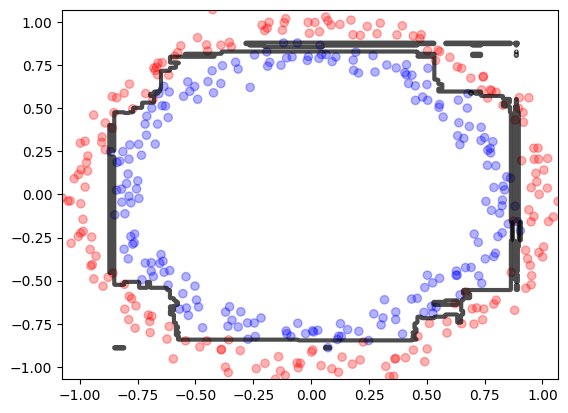

In [ ]:
# Visualizamos los datos y el límite de decisión
plot_2Ddata(X, y)
plot_2D_boundary(rf.predict, np.min(X, axis=0), np.max(X, axis=0))
plt.show()

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import numpy as np

# Creamos un clasificador GaussianNB
gb = GaussianNB()

# Entrenamos el clasificador con los datos X e y
gb.fit(X, y)

print (gb.score(X,y))

0.97


In [ ]:
# @markdown Funciones para graficar



# Función para visualizar los datos en 2D
def plot_2Ddata(X, y, dots_alpha=.3):
    colors = ['blue' if label == 1 else 'red' for label in y]
    plt.scatter(X[:, 0], X[:, 1], color=colors, alpha=dots_alpha)

# Función para visualizar el límite de decisión en 2D
def plot_2D_boundary(predict_fn, Xmin, Xmax, line_width=3, line_alpha=.7, label=None):
    xx, yy = np.meshgrid(np.linspace(Xmin[0], Xmax[0], 500),
                         np.linspace(Xmin[1], Xmax[1], 500))
    Z = predict_fn(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=line_width, alpha=line_alpha)

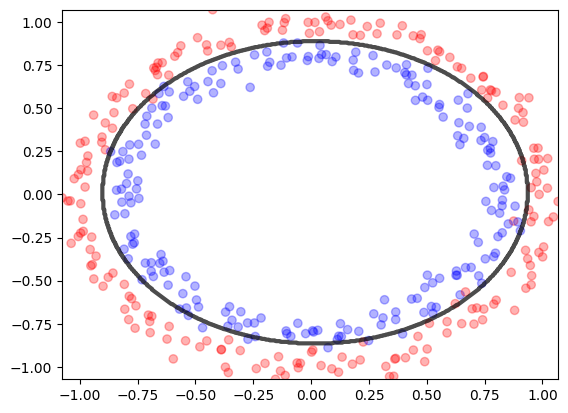

In [ ]:
# Visualizamos los datos y el límite de decisión
plot_2Ddata(X, y)
plot_2D_boundary(gb.predict, np.min(X, axis=0), np.max(X, axis=0))
plt.show()

In [ ]:
# Importamos la clase DecisionTreeClassifier del módulo tree de scikit-learn
from sklearn.tree import DecisionTreeClassifier
# Generamos un conjunto de datos de 400 puntos con ruido
X,y = make_moons(500, noise=0.1)
# Imprimimos las formas de X e y
X.shape, y.shape

((500, 2), (500,))

In [ ]:
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import numpy as np



# Creamos un clasificador GaussianNB
gb = GaussianNB()

# Entrenamos el clasificador con los datos X e y
gb.fit(X, y)

print (gb.score(X,y))

0.868


In [ ]:
# @markdown Funciones para graficar

# Función para visualizar los datos en 2D
def plot_2Ddata(X, y, dots_alpha=.3):
    colors = ['blue' if label == 1 else 'red' for label in y]
    plt.scatter(X[:, 0], X[:, 1], color=colors, alpha=dots_alpha)

# Función para visualizar el límite de decisión en 2D
def plot_2D_boundary(predict_fn, Xmin, Xmax, line_width=3, line_alpha=.7, label=None):
    xx, yy = np.meshgrid(np.linspace(Xmin[0], Xmax[0], 500),
                         np.linspace(Xmin[1], Xmax[1], 500))
    Z = predict_fn(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=line_width, alpha=line_alpha)

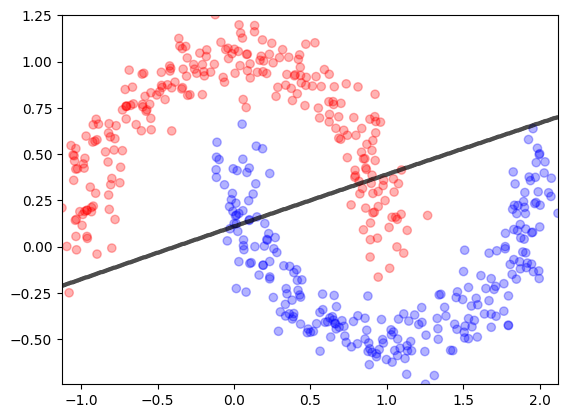

In [ ]:
# Visualizamos los datos y el límite de decisión
plot_2Ddata(X, y)
plot_2D_boundary(gb.predict, np.min(X, axis=0), np.max(X, axis=0))
plt.show()

# SVM

In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

X,y = make_moons(200, noise=0.2)

# Creamos un clasificador SVM con un kernel gaussiano y un parámetro gamma de 1
sv = SVC(gamma=1)

# Entrenamos el clasificador con los datos X e y
sv.fit(X, y)

# Imprimimos el score del clasificador
print(sv.score(X, y))

0.96


In [ ]:
# @markdown Funciones para graficar

# Función para visualizar los datos en 2D
def plot_2Ddata(X, y, dots_alpha=.3):
    colors = ['blue' if label == 1 else 'red' for label in y]
    plt.scatter(X[:, 0], X[:, 1], color=colors, alpha=dots_alpha)

# Función para visualizar el límite de decisión en 2D
def plot_2D_boundary(predict_fn, Xmin, Xmax, line_width=3, line_alpha=.7, label=None):
    xx, yy = np.meshgrid(np.linspace(Xmin[0], Xmax[0], 500),
                         np.linspace(Xmin[1], Xmax[1], 500))
    Z = predict_fn(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=line_width, alpha=line_alpha)

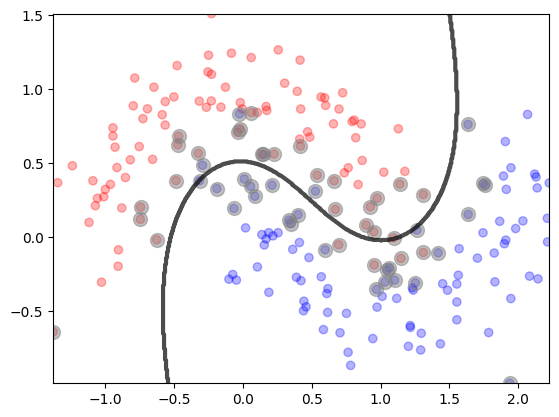

In [ ]:
# Visualizamos los datos y el límite de decisión
plot_2Ddata(X, y)
plot_2D_boundary(sv.predict, np.min(X, axis=0), np.max(X, axis=0))
plt.scatter(sv.support_vectors_[:,0], sv.support_vectors_[:,1], s=100, alpha=.5, color="gray")
plt.show()